In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kopa = pd.read_csv('KOPA.csv')
kopa.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,12/8/2012,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2/20/2015,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,10/28/2013,2000,50,365,3470,4820,13720,Active


In [3]:
kopa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         9195 non-null   object
 1   CustomerGender  9195 non-null   object
 2   Location        9195 non-null   object
 3   Region          9195 non-null   object
 4   TotalPrice      9195 non-null   int64 
 5   StartDate       9195 non-null   object
 6   Deposit         9195 non-null   int64 
 7   DailyRate       9195 non-null   int64 
 8   TotalDays       9195 non-null   int64 
 9   AmountPaid30    9195 non-null   int64 
 10  AmountPaid60    9195 non-null   int64 
 11  AmountPaid360   9195 non-null   int64 
 12  LoanStatus360   9195 non-null   object
dtypes: int64(7), object(6)
memory usage: 934.0+ KB


In [4]:
#check for missing values
kopa.isnull().sum()

Product           0
CustomerGender    0
Location          0
Region            0
TotalPrice        0
StartDate         0
Deposit           0
DailyRate         0
TotalDays         0
AmountPaid30      0
AmountPaid60      0
AmountPaid360     0
LoanStatus360     0
dtype: int64

In [5]:
#check for duplicates 
kopa.duplicated().sum()

0

## Machine learning

# feature engineering 
# to check for categorical data and convert them to numerical for one to create a model

In [6]:
# make copy
kopa_regression = kopa.copy()
kopa_classification = kopa.copy()

In [7]:
#check for categorical data
kopa['Deposit'].dtype

dtype('int64')

In [8]:
cat_cols=[column for column in kopa_regression.columns if kopa_regression[column].dtype=='O']
cat_cols

['Product',
 'CustomerGender',
 'Location',
 'Region',
 'StartDate',
 'LoanStatus360']

# convert categorical data into numerical data
# done by encoding you data: you can hot encoding and label encoding

In [9]:
#label encode our data
from sklearn.preprocessing import LabelEncoder

In [10]:
# instantiate our label encoder
encoder = LabelEncoder()

In [11]:
#fit and transform our categorical data
for column in cat_cols:
    kopa_regression[column] = encoder.fit_transform( kopa_regression[column])

In [12]:
kopa_regression.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,1,1,108,10,16600,1255,2000,40,365,3121,4241,13621,0
1,1,1,219,11,16600,44,2000,40,365,3061,4171,15041,0
2,2,0,441,13,15600,470,1000,40,365,2160,3280,15340,0
3,1,1,552,0,16600,532,2000,40,365,3041,4241,15321,0
4,3,0,659,10,20250,201,2000,50,365,3470,4820,13720,0


# check correlation
# Correlation is used to check the measure of linear relationships of two variables or bivariate data
# A heatmap is used to check correlation of different variables
# A scatter plot is also used to check for correlation of variables
# fields with high correlation variables above 0.9 are dropped

In [1]:
# create a correlation matrix
cor_matrix = kopa_regression.corr()

NameError: name 'kopa_regression' is not defined

<AxesSubplot:>

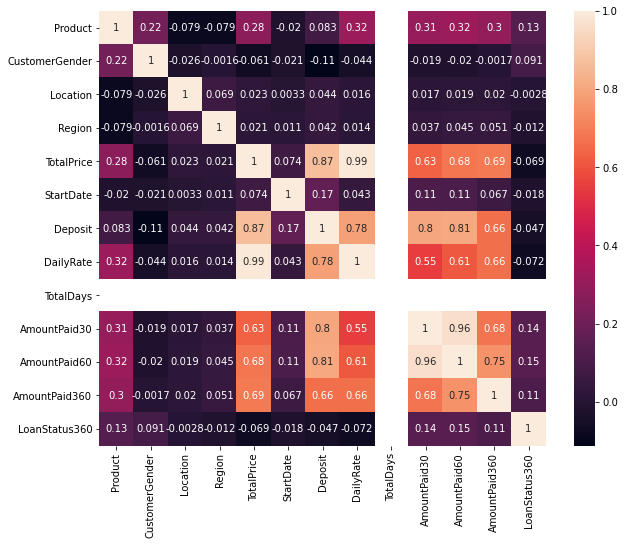

In [14]:
# do visualization: use heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True)

In [15]:
kopa_regression.drop(['Location','StartDate','DailyRate','TotalDays','AmountPaid30'], axis=1, inplace=True)

In [16]:
kopa_regression.head()

,Product,CustomerGender,Region,TotalPrice,Deposit,AmountPaid60,AmountPaid360,LoanStatus360
0,1,1,10,16600,2000,4241,13621,0
1,1,1,11,16600,2000,4171,15041,0
2,2,0,13,15600,1000,3280,15340,0
3,1,1,0,16600,2000,4241,15321,0
4,3,0,10,20250,2000,4820,13720,0


# modelling 

## linear model

In [17]:
# first is to seperate the target variable from the rest of the variables in a supervised learning type of modelling
# seperate x and y
x = kopa_regression.drop(['AmountPaid360'], axis =1) # feature variables
y = kopa_regression['AmountPaid360']

In [18]:
# split data into training and testing data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [19]:
# create our first model, import the necessary models and metrics

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
# instantiate the model
linear = LinearRegression()

# train our model
linear.fit(x_train, y_train)

#test our model
predictions = linear.predict(x_test)
print(predictions)
print(y_test)
linear.score(x_test,y_test)

#evaluate our model
error = mean_absolute_error (y_test, predictions)

print(error)

[13708.09906397 14743.83309801 42201.66627071 ... 17443.52229171
 14873.96077683 12032.67812307]
5154    15501
8974    16600
5017    39762
144     14936
7312     7811
        ...  
3515     7000
7217     4760
5209    13510
9064    16600
2279    12700
Name: AmountPaid360, Length: 1839, dtype: int64
3176.6749347351683


## Decision tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
# instantiate the model
dt = DecisionTreeRegressor()

# train the model
dt.fit(x_train, y_train)

# test the model
predictions = dt.predict(x_test)

# evaluate the model
error = mean_absolute_error (y_test, predictions)
print(error)

2178.1760026107563


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
# instantiate the model
RF = RandomForestRegressor()

# train the model
RF.fit(x_train, y_train)

# test the model
predictions = RF.predict(x_test)

# evaluate the model
error = mean_absolute_error (y_test, predictions)
print(error)

RF.score(x_test, y_test)

1867.0389494937908


0.8560218698136067

In [35]:
hey

NameError: name 'hey' is not defined